<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/Sept_Beg_Mor_DAV_3_Corr_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr ,spearmanr, ttest_rel


In [2]:

!gdown 1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS -O 'weight-height.csv'


Downloading...
From: https://drive.google.com/uc?id=1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS
To: /content/weight-height.csv
100% 428k/428k [00:00<00:00, 3.78MB/s]


In [3]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


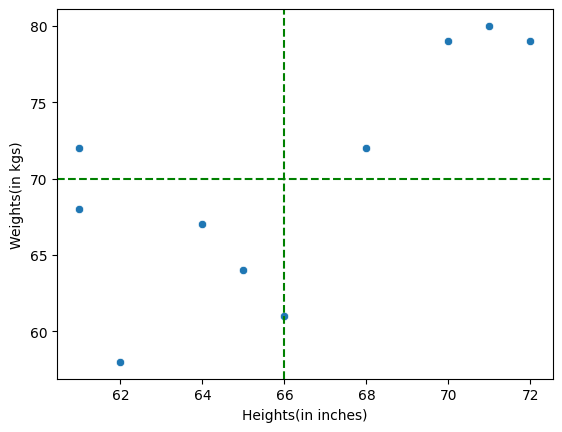

In [4]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

sns.scatterplot(x=heights, y=weights)
plt.axvline(heights.mean(),color="g",linestyle="--")
plt.axhline(weights.mean(),color="g",linestyle="--")
plt.xlabel("Heights(in inches)")
plt.ylabel("Weights(in kgs)")
plt.show()

In [5]:
print("Covariance: ", np.cov(heights,weights)[0,1])

Covariance:  22.666666666666664


In [6]:
pearsonr(heights,weights)

PearsonRResult(statistic=0.7094289771951879, pvalue=0.02157516403482845)

In [7]:
heights_m = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])*2.54
weights_m = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])*1000

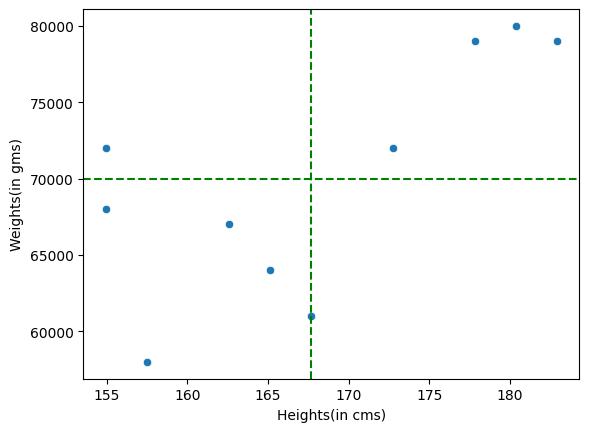

In [8]:
sns.scatterplot(x=heights_m, y=weights_m)
plt.axvline(heights_m.mean(),color="g",linestyle="--")
plt.axhline(weights_m.mean(),color="g",linestyle="--")
plt.xlabel("Heights(in cms)")
plt.ylabel("Weights(in gms)")
plt.show()

In [9]:
print("Covariance: ", np.cov(heights_m,weights_m)[0,1])

Covariance:  57573.33333333334


In [10]:
pearsonr(heights_m,weights_m)

PearsonRResult(statistic=0.7094289771951879, pvalue=0.02157516403482845)

In [11]:
df=pd.DataFrame(data=[heights_m,weights_m]).transpose().rename(columns={0:"height_m",1:"Weight_m"})
df

,height_m,Weight_m
0,172.72,72000.0
1,157.48,58000.0
2,162.56,67000.0
3,154.94,72000.0
4,177.80,79000.0
5,167.64,61000.0
6,154.94,68000.0
7,165.10,64000.0
8,180.34,80000.0
9,182.88,79000.0


In [12]:
df.corr()

,height_m,Weight_m
height_m,1.000000,0.709429
Weight_m,0.709429,1.000000


In [13]:
spearmanr(heights,weights)

SignificanceResult(statistic=0.6024493002399199, pvalue=0.06529313205986141)

In [14]:
spearmanr(heights_m,weights_m)

SignificanceResult(statistic=0.6024493002399199, pvalue=0.06529313205986141)

In [15]:
df

,height_m,Weight_m
0,172.72,72000.0
1,157.48,58000.0
2,162.56,67000.0
3,154.94,72000.0
4,177.80,79000.0
5,167.64,61000.0
6,154.94,68000.0
7,165.10,64000.0
8,180.34,80000.0
9,182.88,79000.0


<Axes: >

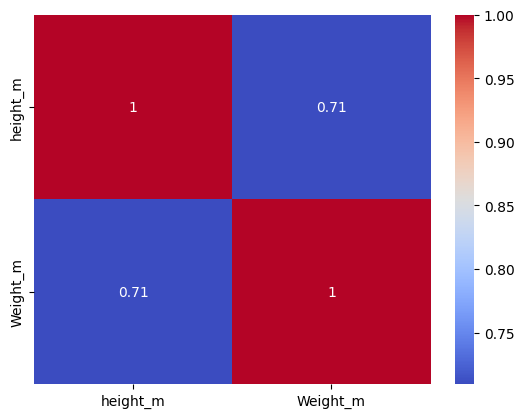

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height_m  10 non-null     float64
 1   Weight_m  10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [18]:
df1=sns.load_dataset("mpg")
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


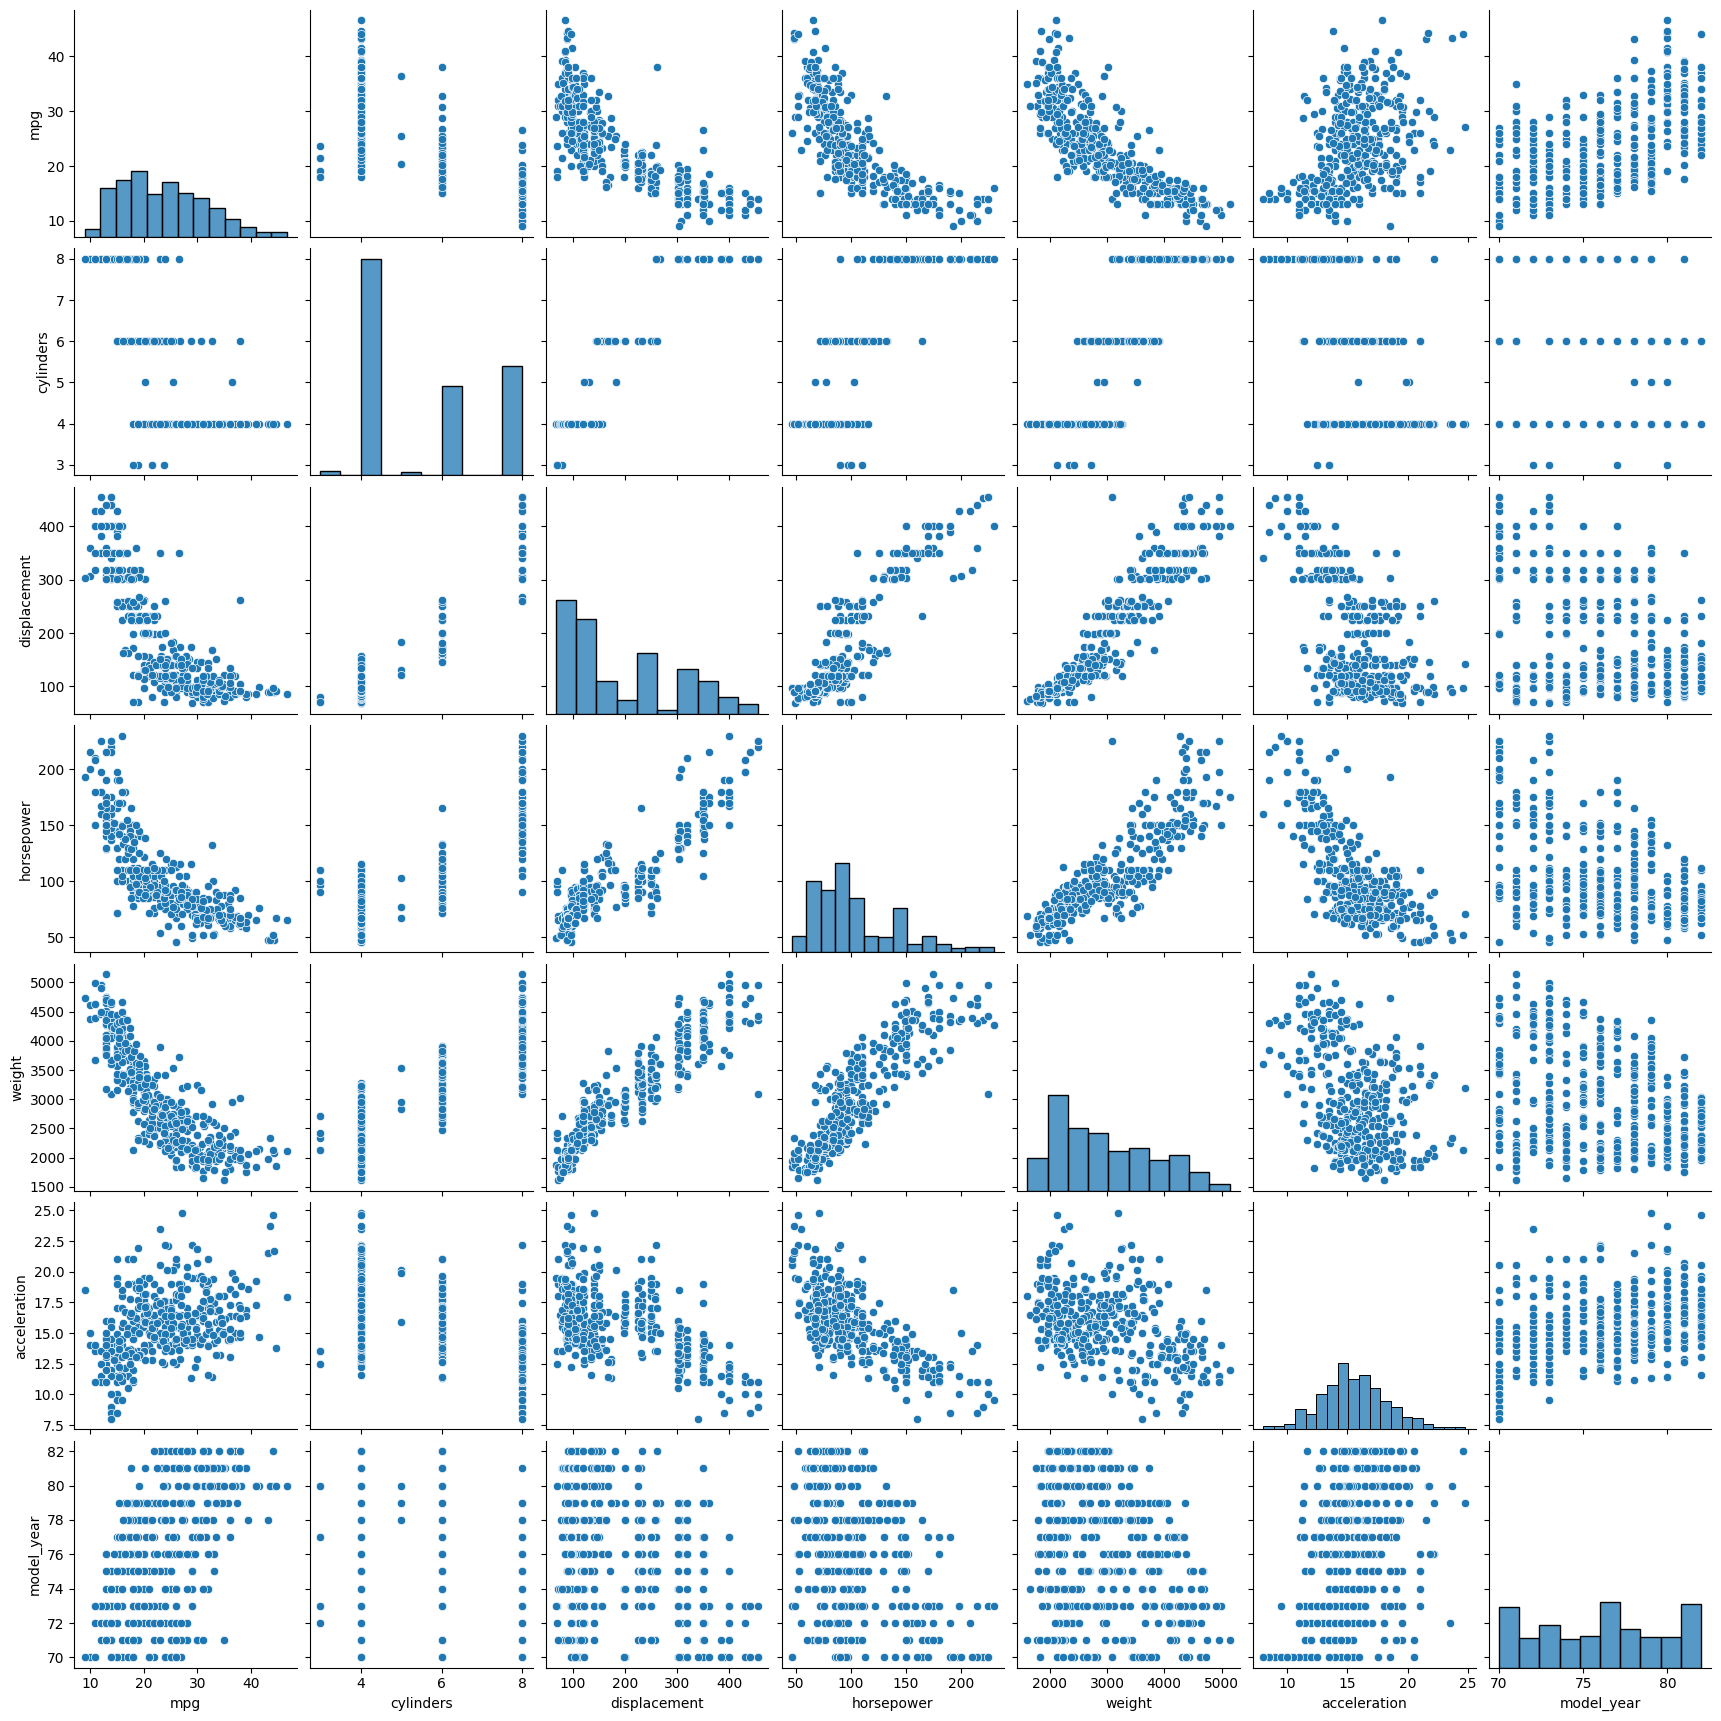

In [19]:
sns.pairplot(df1)

In [20]:
df2=df1[["weight","mpg"]]
df2

,weight,mpg
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
393,2790,27.0
394,2130,44.0
395,2295,32.0
396,2625,28.0


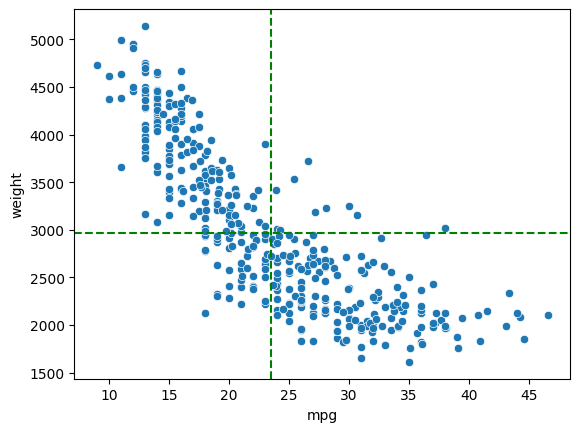

In [21]:
sns.scatterplot(x=df2["mpg"], y=df2["weight"])
plt.axvline(df2["mpg"].mean(),color="g",linestyle="--")
plt.axhline(df2["weight"].mean(),color="g",linestyle="--")
plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()

In [22]:
np.cov(df2["weight"],df2["mpg"])

array([[ 7.17140991e+05, -5.50521175e+03],
       [-5.50521175e+03,  6.10896108e+01]])

In [23]:
pearsonr(df2["weight"],df2["mpg"])

PearsonRResult(statistic=-0.831740933244335, pvalue=2.9727995640496354e-103)

In [24]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [25]:
spearmanr(df2["weight"],df2["mpg"])

SignificanceResult(statistic=-0.8749473981990712, pvalue=8.643768710426594e-127)

In [26]:
df1.corr()

<ipython-input-26-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [27]:
df1.corr(method="spearman")

<ipython-input-27-60abdcbf3beb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr(method="spearman")


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632
model_year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000


<ipython-input-28-7f59b62aad2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")


<Axes: >

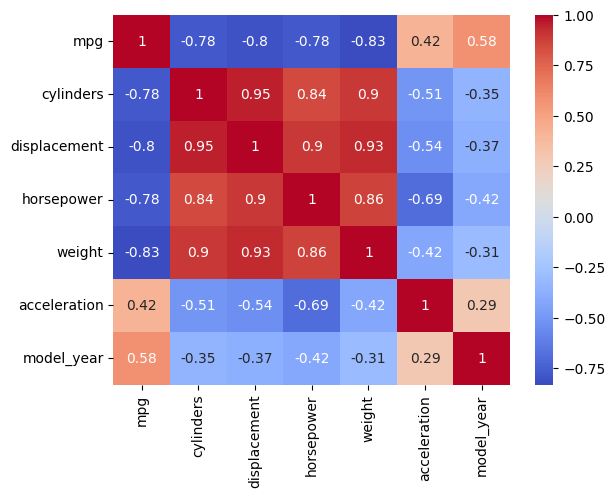

In [28]:
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")

<ipython-input-29-1e2f3110b9a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(method="spearman"),annot=True,cmap="coolwarm")


<Axes: >

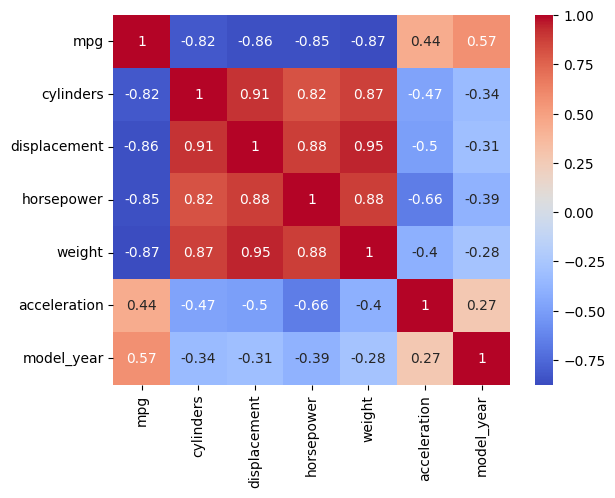

In [29]:
sns.heatmap(df1.corr(method="spearman"),annot=True,cmap="coolwarm")

In [30]:
heights

array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])

In [31]:
weights

array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

In [32]:
df=pd.read_csv("weight-height.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [33]:
df.drop(columns=["Gender"],inplace=True)

In [34]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [35]:
df_rank=df.rank()
df_rank

,Height,Weight
0,9779.0,9983.0
1,7165.0,5092.0
2,9824.0,9537.0
3,9137.0,9772.0
4,8042.0,9188.0
...,...,...
9995,4854.0,2603.0
9996,5642.0,5874.0
9997,2814.0,1747.0
9998,7382.0,5243.0


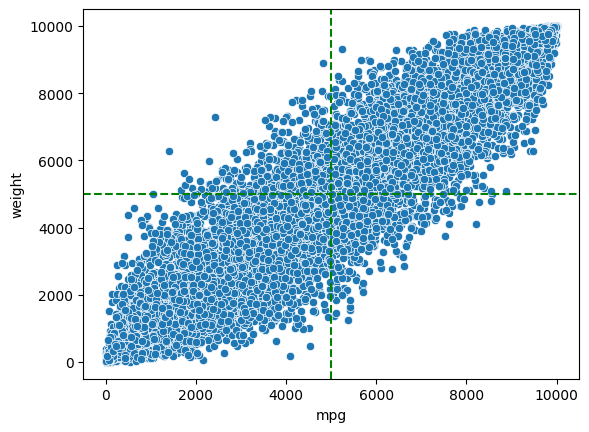

In [36]:
sns.scatterplot(x=df_rank["Height"], y=df_rank["Weight"])
plt.axvline(df_rank["Height"].mean(),color="g",linestyle="--")
plt.axhline(df_rank["Weight"].mean(),color="g",linestyle="--")
plt.xlabel("mpg")
plt.ylabel("weight")
plt.show()

In [37]:
pearsonr(df_rank["Height"],df_rank["Weight"])

PearsonRResult(statistic=0.9257076644210764, pvalue=0.0)

In [38]:
spearmanr(df_rank["Height"],df_rank["Weight"])

SignificanceResult(statistic=0.9257076644210767, pvalue=0.0)

In [44]:
#Q7

ttest_rel([82, 71, 64, 65.2, 67.8, 64.7,95,77],[85, 74, 63.5, 69.4, 71.6, 65,90,78],alternative = "less")

TtestResult(statistic=-1.1421853793555032, pvalue=0.14546808501326386, df=7)

In [45]:
#Q8

ttest_rel([7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20], [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34],alternative = "greater")

TtestResult(statistic=5.111096450191605, pvalue=0.00031778119819482275, df=9)